**Homeworks – Optimization, 2021/22. semester I.**

*Week 1*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

# Ex3

## Problem

Consider the problem:

\begin{align*}
x_1 + 2x_2 &\rightarrow \text{max} \\
x_2 &\leq 4 \\
x_1  + x_2 &\leq 6 \\
2x_1 + x_2 &\leq 10 \\
x_1, x_2 &\geq 0 \\
\end{align*}

Represent these constraints on the plane. Find a point that maximizes $x_1+2x_2$.

## Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

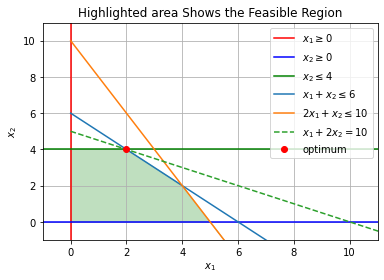

In [2]:
# Plot settings
plt.grid(True)
plt.xlim((-1, 11))
plt.ylim((-1, 11))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

x_1 = np.linspace(0, 30, 1000)

# Draw constraints
plt.axvline(0, color='red', label=r'$x_1 \geq 0$') # constraint 1
plt.axhline(0, color='blue', label=r'$x_2 \geq 0$')  # constraint 2
plt.axhline(4, color='green', label=r'$x_2 \leq 4$') # constraint 3
plt.plot(x_1, 6-x_1,
         label=r'$x_1 + x_2 \leq 6$') # constraint 4
plt.plot(x_1, 10 - (2*x_1),
         label=r'$2x_1 + x_2 \leq 10$') # constraint 5

# Draw solution
plt.plot(x_1, -x_1/2 + 5,
        label=r'$x_1 + 2x_2 = 10$',
        linestyle='--')
plt.plot(2, 4, 'ro', label='optimum')

# highlight feasible area
plt.title('Highlighted area Shows the Feasible Region')
plt.fill_between(x_1,
                 np.minimum(10 - 2*x_1, 0),
                 np.minimum(np.minimum(10 - 2*x_1, 6 - x_1),4),
                 color='green',
                 alpha=0.25)
plt.legend()
plt.show()

The vertex $(x_1 = 2, x_2 = 4)$ maximizes the objective function. The optimal value is $10$.